# Summary
Given the elements of $\left\{ c_{l}, d_{l}\right\}$, construct the endomorphic (domain and range are the same space) piecewise-linear function

$$
f\left(x\right):=\begin{cases}
\sum_{l}f_{l}\left(x\right) & \text{if }x\in\left[-1,1\right],\\
1 & \text{if }x>s,\\
-1 & \text{otherwise}.
\end{cases}
$$


The linear function on interval $l$ is

$f_{l}\left(x\right):=\left(m_{l}x+b_{l}\right)1_{a_{l},b_{l}}\left(x\right).$


The choice of $\left\{ m_{l},b_{l}\right\}$ is such that:

* $f$ is continuous.
* $\sum_{l}\left(b_{l}-a_{l}\right)=c$.
* $m_{l}=\frac{d_{l}-c_{l}}{b_{l}-a_{l}}$.

The parameters $\left\{ c_{l},d_{l}\right\}$ define the $l$-th interval in the range of $f$, while $\left\{ a_{l},b_{l}\right\}$ define the domain. The compression $c$ characterizes the slope of the linears in the transform $f$.

# Dependencies for this example
The following installs the packages used in this example.
```julia
import Pkg
Pkg.add(path="https://github.com/RoyCCWang/IntervalMonoFuncs.jl")
Pkg.add("PyPlot")
```

# The example guide

In [6]:
import IntervalMonoFuncs
using LinearAlgebra

import PyPlot
fig_num = 1

import Random
Random.seed!(25)

Random.TaskLocalRNG()

Specify the kind of piecewise-linear function we want to make. The choice of `intervals_y_st` and `intervals_y_fin` will be visually shown later.

In [7]:
intervals_y_st = [-1; -0.82; 0.59] # This is {c_l} in the documentation. All elements must be between lb and ub.
intervals_y_fin = [-0.9; 0.044; 0.97] # This is {d_l} in the documentation. All elements must be between lb and ub.

# These define the interval of the domain and range.
lb = -2.0
ub = 1.0

# specify the total amount of domain for covering the intervals specified by intervals_y_st and intervals_y_fin. In proportion units, i.e., 0 to 1.
domain_proportion = 0.9

0.9

Create the piecewise-linear function's parameters, create an anonymous function `f` that implements it, and `finv` for its inverse.

In [8]:
# the returned scale is 1.0 if -1 <= lb < ub <= 1 by design of getpiecewiselines(). Otherwise it returns lb_normalized, ub_normalized, scale = IntervalMonoFuncs.normalizebounds(lb, ub).
info, scale = IntervalMonoFuncs.getpiecewiselines(intervals_y_st, intervals_y_fin, domain_proportion; lb = lb, ub = ub)

f = xx->IntervalMonoFuncs.evalpiecewise2Dlinearfunc(xx, info, scale)
finv = xx->IntervalMonoFuncs.evalinversepiecewise2Dlinearfunc(xx, info, scale);

Extract the boundary points for each line segment. Notice the relation to `intervals_y_fin` and `intervals_y_st`.

In [9]:
start_pts, fin_pts, boundary_pts = IntervalMonoFuncs.getboundarypts(intervals_y_st, intervals_y_fin, lb, ub, info, scale)

boundary_xs = collect(boundary_pts[i][1] for i in eachindex(boundary_pts) )
boundary_ys = collect(boundary_pts[i][2] for i in eachindex(boundary_pts) )

@show boundary_xs
@show boundary_ys
@show intervals_y_st
@show intervals_y_fin

boundary_xs = [-2.0, -1.818840579710145, -1.6179477225672878, -1.6034549689440993, 0.13225931677018643, 0.23117236024844717, 0.9945652173913043, 1.0]
boundary_ys = [-2.0, -1.0, -0.9, -0.82, 0.044, 0.59, 0.97, 1.0]
intervals_y_st = [-1.0, -0.82, 0.59]
intervals_y_fin = [-0.9, 0.044, 0.97]


3-element Vector{Float64}:
 -0.9
  0.044
  0.97

The $y$ coordinate of the boundary points, `boundary_ys`, contains the coodinates in both `intervals_y_st` and `intervals_y_fin` because the latter two variables specify the start and finish of line segments in `f`.

Visualize

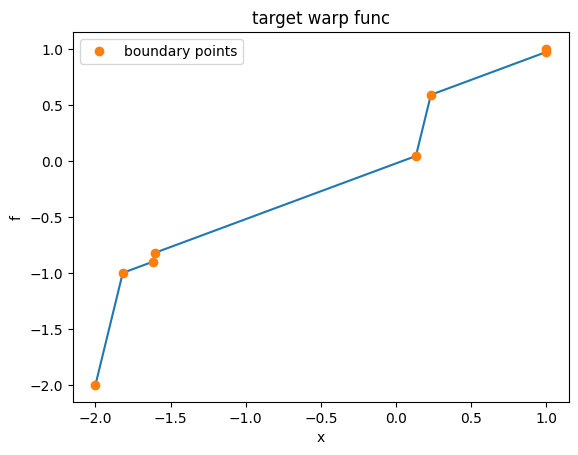

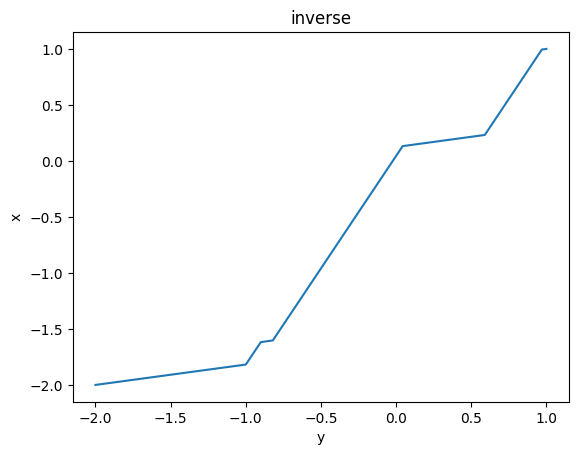

PyObject Text(0.5, 1.0, 'inverse')

In [10]:
x_range = LinRange(lb, ub, 5000)
f_x = f.(x_range)
finv_y = finv.(f_x)

PyPlot.figure(fig_num)
fig_num += 1

PyPlot.plot(x_range, f_x)
PyPlot.plot(boundary_xs, boundary_ys, "o", label = "boundary points")

PyPlot.legend()
PyPlot.xlabel("x")
PyPlot.ylabel("f")
PyPlot.title("target warp func")

#### inverse.
PyPlot.figure(fig_num)
fig_num += 1

PyPlot.plot(f_x, finv_y)

PyPlot.xlabel("y")
PyPlot.ylabel("x")
PyPlot.title("inverse")